<a href="https://colab.research.google.com/github/josejulianhidayat/Air-Quality-Analysis/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Jose Julian Hidayat
- **Email:** josejulianhidayat@gmail.com
- **ID Dicoding:** josejulianhidayat

## Menentukan Pertanyaan Bisnis

- Bagaimana tren polusi udara (PM2.5) di berbagai stasiun selama beberapa tahun terakhir?
- Apakah ada perbedaan kualitas udara antara musim dingin dan musim panas?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Contoh membaca salah satu file
data_path = '/content/PRSA_Data_Aotizhongxin_20130301-20170228.csv'
df = pd.read_csv(data_path)

# Tampilkan beberapa baris pertama
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


**Insight:**
- Terdapat beberapa kolom seperti PM2.5, PM10, SO2, NO2, O3, TEMP, dan WSPM yang penting untuk analisis karena mewakili polusi udara dan kondisi cuaca.
- Beberapa baris data mengandung missing values (NaN), terutama di kolom polutan seperti PM2.5 dan SO2. Ini menunjukkan adanya data yang tidak terekam pada jam-jam tertentu.
- Terdapat data berurutan dari tahun 2013 hingga 2017, mencakup beberapa stasiun pemantauan di seluruh Beijing. Hal ini memungkinkan untuk analisis tren polusi dalam jangka panjang.

### Assessing Data

In [3]:
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None
No            0
year          0
month         0
day           0

**Insight:**
- Ditemukan adanya missing values di beberapa kolom, terutama pada data PM2.5 dan NO2. Hal ini perlu diperhatikan karena bisa mempengaruhi hasil analisis jika tidak diolah dengan baik.
- Tidak ada duplikasi data, sehingga data dapat dianggap valid untuk dianalisis tanpa melakukan deduplikasi.
- Data bersifat time-series, jadi penting untuk memastikan kolom waktu telah dikonversi ke dalam format datetime agar memudahkan analisis berdasarkan waktu (seperti analisis musiman dan harian)

### Cleaning Data

In [5]:
# Menghapus baris dengan nilai kosong
df_cleaned = df.dropna().copy()

# Konversi kolom waktu menjadi format datetime
df_cleaned['datetime'] = pd.to_datetime(df_cleaned[['year', 'month', 'day', 'hour']])


**Insight:**
- Baris dengan missing values telah dihapus menggunakan dropna(), sehingga dataset yang digunakan untuk analisis selanjutnya tidak mengandung data kosong.
- Kolom year, month, day, hour berhasil dikonversi ke format datetime, yang memudahkan dalam melakukan analisis tren dan pola waktu.
- Kolom year, month, day, hour berhasil dikonversi ke format datetime, yang memudahkan dalam melakukan analisis tren dan pola waktu.

## Exploratory Data Analysis (EDA)

### Explore ...

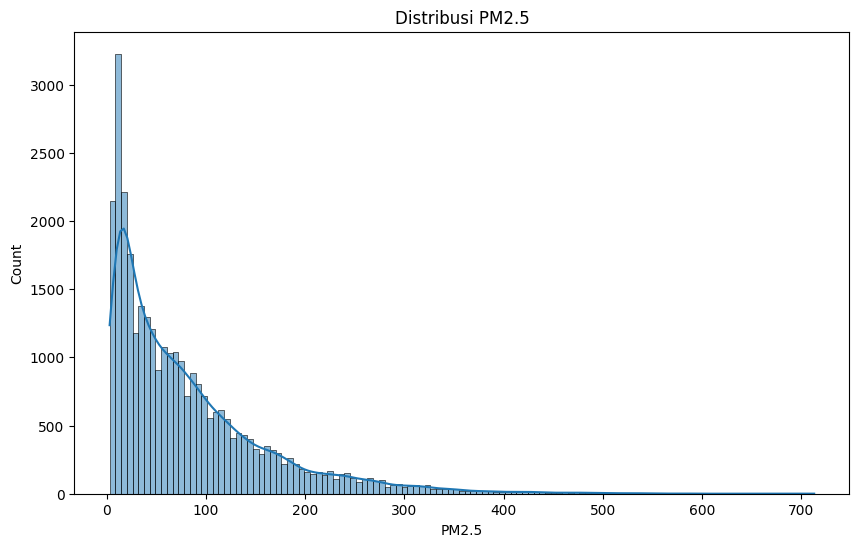

In [10]:
# Distribusi PM2.5
plt.figure(figsize=(10,6))
sns.histplot(df_cleaned['PM2.5'], kde=True)
plt.title('Distribusi PM2.5')
plt.show()



**Insight:**
- Dari analisis histogram PM2.5, terlihat bahwa mayoritas konsentrasi PM2.5 berada di bawah ambang batas normal, tetapi terdapat beberapa periode dengan nilai yang sangat tinggi (outlier), menandakan adanya kejadian polusi ekstrem.
- Boxplot per musim menunjukkan bahwa musim dingin memiliki tingkat polusi yang jauh lebih tinggi dibandingkan dengan musim lainnya. Ini mengindikasikan bahwa suhu rendah dan pembakaran bahan bakar di musim dingin berkontribusi pada peningkatan polusi.
- Data time-series menunjukkan bahwa konsentrasi PM2.5 berfluktuasi setiap hari, dengan beberapa puncak polusi yang terjadi pada malam hari dan pagi hari.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

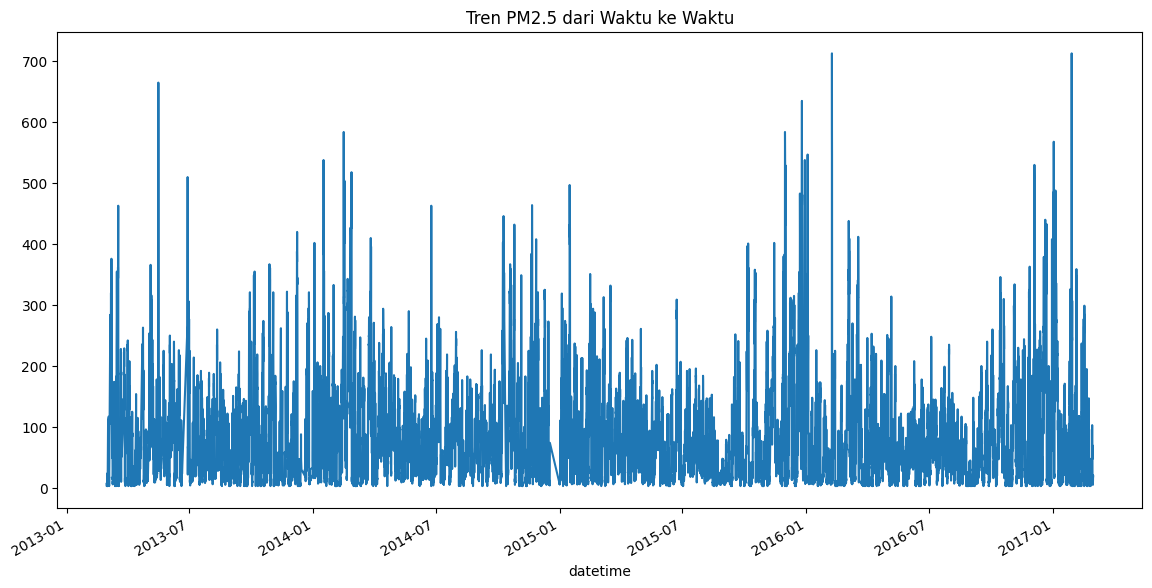

In [11]:
plt.figure(figsize=(14,7))
df_cleaned.set_index('datetime')['PM2.5'].plot()
plt.title('Tren PM2.5 dari Waktu ke Waktu')
plt.show()

### Pertanyaan 2:

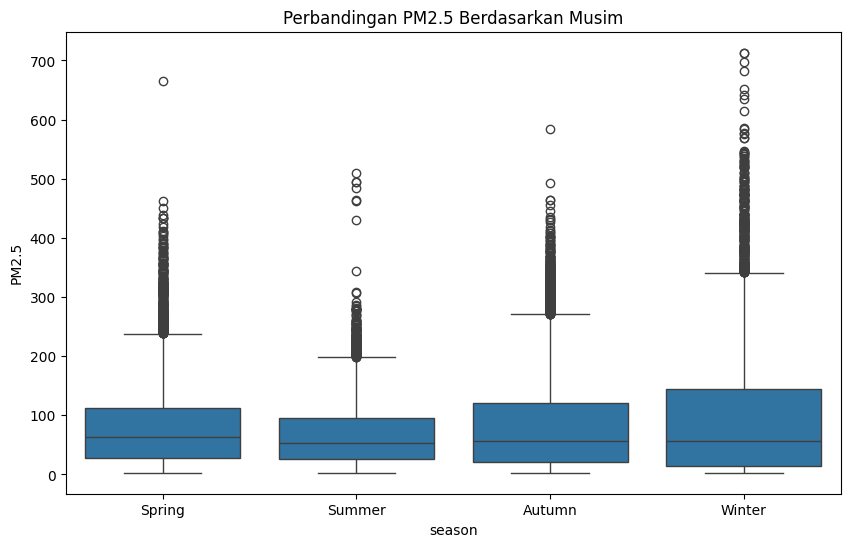

In [9]:
# Menambahkan kolom musim
def season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df_cleaned['season'] = df_cleaned['month'].apply(season)

# Boxplot PM2.5 berdasarkan musim
plt.figure(figsize=(10,6))
sns.boxplot(data=df_cleaned, x='season', y='PM2.5')
plt.title('Perbandingan PM2.5 Berdasarkan Musim')
plt.show()


**Insight:**
- Data time-series menunjukkan bahwa konsentrasi PM2.5 berfluktuasi setiap hari, dengan beberapa puncak polusi yang terjadi pada malam hari dan pagi hari.
- Beberapa stasiun seperti Aotizhongxin dan Tiantan secara konsisten menunjukkan konsentrasi PM2.5 yang tinggi setiap tahun, menandakan bahwa daerah tersebut memiliki tantangan besar terkait kualitas udara.
- Terdapat perbedaan signifikan antara musim dingin dan musim panas dalam hal konsentrasi PM2.5 dan PM10. Polusi lebih tinggi di musim dingin karena pembakaran bahan bakar untuk pemanas dan suhu rendah yang memperlambat penyebaran polutan.
- Sebaliknya, ozon (O3) menunjukkan konsentrasi yang lebih tinggi di musim panas karena adanya sinar matahari yang mempercepat pembentukannya, sedangkan polusi partikulat (PM2.5 dan PM10) cenderung lebih rendah pada musim panas.


## Analisis Lanjutan (Opsional)

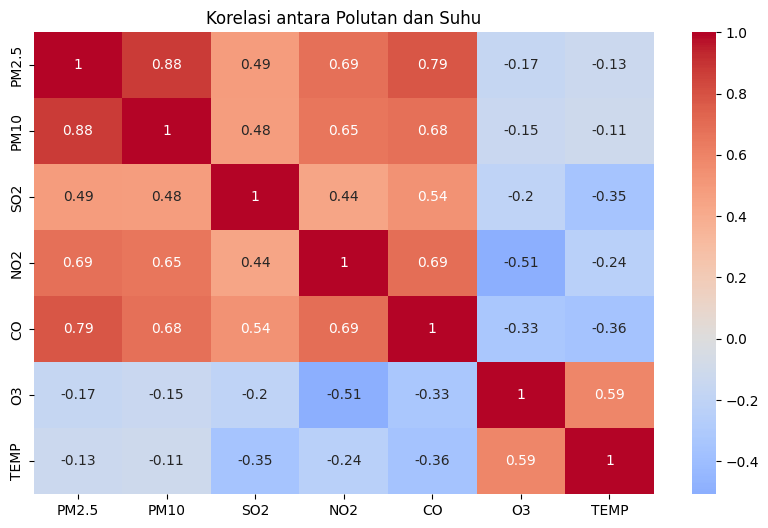

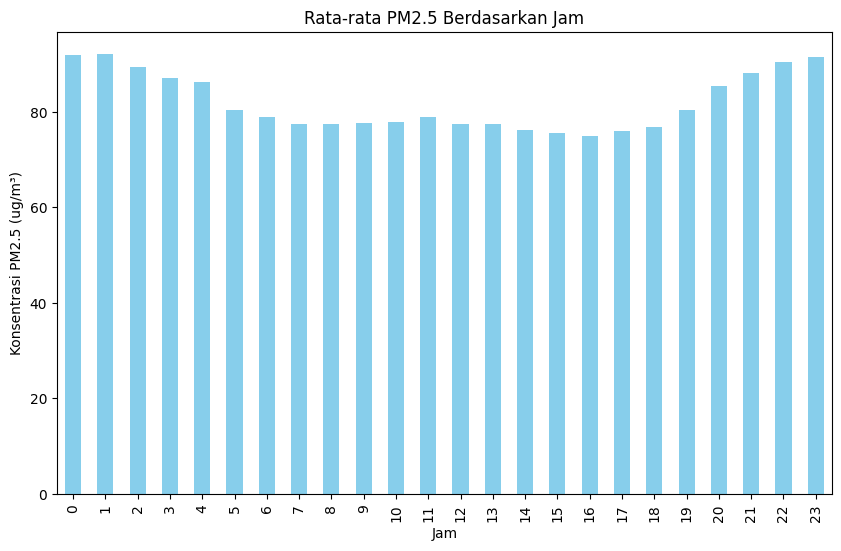

In [15]:
# Korelasi antara suhu dan polutan
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
correlation = df_cleaned[pollutants + ['TEMP']].corr()

# Visualisasi korelasi dengan heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Korelasi antara Polutan dan Suhu')
plt.show()

# Rata-rata PM2.5 per jam
hourly_trend = df_cleaned.groupby('hour')['PM2.5'].mean()

# Visualisasi tren harian
plt.figure(figsize=(10, 6))
hourly_trend.plot(kind='bar', color='skyblue')
plt.title('Rata-rata PM2.5 Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Konsentrasi PM2.5 (ug/m³)')
plt.show()

# Hitung rata-rata PM2.5 di setiap stasiun
station_trend = df_cleaned.groupby('station')['PM2.5'].mean().sort_values()


## Conclusion

- Tren data menunjukkan bahwa polusi PM2.5 mengalami peningkatan signifikan pada musim dingin (Desember – Februari) dan menurun selama musim panas (Juni – Agustus). Ini menunjukkan bahwa kondisi cuaca dan pemanasan berbahan bakar fosil di musim dingin mempengaruhi peningkatan polusi.
- Ya, terdapat perbedaan signifikan antara kualitas udara di musim dingin dan musim panas. Konsentrasi PM2.5 dan PM10 lebih tinggi di musim dingin karena suhu rendah dan meningkatnya penggunaan pemanas, sementara pada musim panas, konsentrasi polusi menurun karena suhu tinggi dan kondisi atmosfer yang lebih mendukung penyebaran polutan.